[Open in Colab](https://colab.research.google.com/drive/1vBlX5p5vPOU2VIVJJGnm_2EoOLG9JNXg?usp=sharing)



In [ ]:
!git clone https://github.com/isl-org/DPT.git

Cloning into 'DPT'...
remote: Enumerating objects: 782, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 782 (delta 144), reused 114 (delta 114), pack-reused 606 (from 1)
Receiving objects: 100% (782/782), 458.16 KiB | 12.06 MiB/s, done.
Resolving deltas: 100% (371/371), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r/content/DPT/requirements.txt

ERROR: Could not find a version that satisfies the requirement torch==1.8.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1)
ERROR: No matching distribution found for torch==1.8.1


# Setting up the python 3.7 environment

- DPT was tested with Python 3.7
- Setting up a Python 3.7 environment in Google Colab and install the dependencies from "requirements.txt".
- Colab python environment is predefined so download and install Miniconda silently, then initialize it and update the PATH.

- Creating a new conda environment with Python version 3.7.

In [ ]:
import os
import sys
import shutil

# Download Miniconda installer
miniconda_installer = "Miniconda3-latest-Linux-x86_64.sh"
miniconda_path = "/content/miniconda3"

if not os.path.exists(miniconda_path):
    !wget -q https://repo.anaconda.com/miniconda/$miniconda_installer
    # Install Miniconda silently
    !bash $miniconda_installer -bfp $miniconda_path
    # Initialize conda for bash
    !$miniconda_path/bin/conda init bash

# Accept the Terms of Service
!$miniconda_path/bin/conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
!$miniconda_path/bin/conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r


# Update PATH environment variable without restarting
os.environ['PATH'] = f"{miniconda_path}/bin:{os.environ['PATH']}"

# Verify installation (optional)
!conda --version
!which conda

PREFIX=/content/miniconda3
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /content/miniconda3
no change     /content/miniconda3/condabin/conda
no change     /content/miniconda3/bin/conda
no change     /content/miniconda3/bin/conda-env
no change     /content/miniconda3/bin/activate
no change     /content/miniconda3/bin/deactivate
no change     /content/miniconda3/etc/profile.d/conda.sh
no change     /content/miniconda3/etc/fish/conf.d/conda.fish
no change     /content/miniconda3/shell/condabin/Conda.psm1
no change     /content/miniconda

In [ ]:
# Create a new conda environment with Python 3.7
!conda create -y --prefix /content/myenv python=3.7

Jupyter detected...
2 channel Terms of Service accepted
Retrieving notices: - \ | / - \ | / - \ | / done
Channels:
 - defaults
Platform: linux-64
Solving environment: - done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /content/myenv

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.12.2  |       h06a4308_0         125 KB
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    pip-22.3.1                 |   py37h06a4308_0         2.7 MB
    python-3.7.16              |       h7a1cb2a_0        44.8 MB
    setuptools-65.6.3          |   py3

In [ ]:
# Activate the conda environment
# Note: Activating a conda environment in a script like this can be tricky
# due to how shell environments work in notebooks. We'll adjust the PATH
# to prioritize the new environment's executables.
import os

conda_env_path = '/content/myenv'
os.environ['PATH'] = f"{conda_env_path}/bin:{os.environ['PATH']}"

# Verify the Python version to confirm the environment is effectively activated
!python --version

Python 3.7.16


In [ ]:
# Install the dependencies using pip from the requirements.txt file
!pip install -r /content/DPT/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.1/804.1 MB 768.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.9 MB/s eta 0:00:00


In [ ]:
import torch
torch.load("/content/drive/MyDrive/Research_trends_depth_estimation/dpt_hybrid_kitti-cb926ef4.pt", map_location="cpu")


OrderedDict([('pretrained.model.cls_token',
              tensor([[[-2.1887e-03,  1.4715e-02,  9.5725e-04, -3.8989e-03,  8.1932e-03,
                        -5.9620e-04, -2.7507e-03,  1.3377e-02,  8.7153e-06, -8.1483e-05,
                         6.7764e-03,  1.3935e-03,  5.0986e-02,  6.0923e-03,  5.8131e-03,
                         2.3195e-03, -2.4945e-02, -3.0513e-02, -4.0081e-03, -6.8837e-03,
                         9.7195e-03,  1.8640e-04, -2.5457e-02,  8.2429e-03, -5.8734e-02,
                         4.4953e-02, -1.8595e-02,  5.8699e-03,  2.1158e-02,  8.1044e-04,
                         1.1994e-03,  1.5944e-02, -8.8727e-04,  4.0448e-03, -1.1042e-02,
                         1.4471e-03, -3.0155e-04,  8.9821e-03,  2.8564e-04, -3.3465e-03,
                         3.6582e-03,  8.6253e-03, -4.0870e-03, -2.9999e-03, -1.0718e-02,
                         4.3762e-03, -5.3616e-03, -6.2054e-02, -3.0582e-02,  5.6431e-03,
                        -1.3365e-02, -2.0577e-02, -4.1004e-02,  3.

In [ ]:
# !cp /content/drive/MyDrive/Research_trends_depth_estimation/dpt_hybrid_kitti-cb926ef4.pt /content/DPT/weights/


In [ ]:
# !cp /content/000000.png /content/DPT/input

In [ ]:
# # Change directory to /content/DPT before running the script
# %cd /content/DPT
# !python run_monodepth.py -t dpt_hybrid_kitti

/content/DPT
initialize
device: cpu
start processing
  processing input/000000.png (1/1)
/content/myenv/lib/python3.7/site-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
finished


In [ ]:
# # List files in the weights directory
# !ls /content/DPT/weights

# # Print the current working directory
# import os
# print(f"Current working directory: {os.getcwd()}")

archive  dpt_hybrid_kitti-cb926ef4.pt  trash.pt
Current working directory: /content


In [ ]:
# !cp /content/drive/MyDrive/Research_trends_depth_estimation/dpt_hybrid_kitti-cb926ef4.pt /content/DPT/weights

# DENSE PREDICTION TRANSFORMER (DPT) - HYBRID MIDAS ARCHITECTURE

## Monocular Depth Estimation Implementation


### Paper: "Vision Transformers for Dense Prediction"
### Authors: René Ranftl, Alexey Bochkovskiy, Vladlen Koltun (Intel Labs)

![DPT architecture](https://drive.google.com/uc?id=1MfZav853dVZlOAAlr4awhB9-J1DghbPO)

This implementation uses the DPT-Hybrid architecture which combines:
1. ResNet-50 CNN backbone for initial feature extraction
2. Vision Transformer (ViT) for global context understanding
3. Convolutional decoder for dense depth prediction

Key Innovation: Unlike fully-convolutional networks that progressively
downsample features, DPT maintains constant resolution throughout the
transformer stages with global receptive fields at every layer.


In [ ]:
import os
import glob
import torch
import cv2
import numpy as np
import torch.nn as nn
from torchvision.transforms import Compose
from PIL import Image
import timm
import types
import math
import torch.nn.functional as F
import re
import sys
import matplotlib.pyplot as plt

# BASE MODEL CLASS

In [ ]:
# Base Model Class
class BaseModel(torch.nn.Module):

    """
    Base model class providing common functionality for loading pretrained weights.

    This serves as the foundation for all model architectures, handling the
    checkpoint loading logic with support for both raw model states and
    optimizer-included checkpoints.
    """
    def load(self, path):

        """
        Load model weights from a checkpoint file.

        Args:
            path (str): Path to the checkpoint file (.pt or .pth)

        Notes:
            - Automatically detects if checkpoint includes optimizer state
            - Uses CPU mapping to allow loading on machines without GPU
            - Compatible with both training and inference checkpoints
        """

        parameters = torch.load(path, map_location=torch.device("cpu"))

        # handle checkpoints that include optimizer state
        if "optimizer" in parameters:
            parameters = parameters["model"]
        self.load_state_dict(parameters)




 # Section 1: Core Decoder Modules

## Decoder upsampling operations

Purpose:

- Wraps PyTorch's interpolation function as a module
- Used in decoder to progressively upsample predictions
- Enables bilinear interpolation for smooth upsampling

In [ ]:
# DPT Depth Model
import torch.nn as nn
import torch.nn.functional as F

class Interpolate(nn.Module):

    """
    Learnable interpolation module for spatial upsampling.

    This wraps PyTorch's interpolate function in a nn.Module for easy
    integration into Sequential containers. Used extensively in the decoder
    for progressive upsampling of feature maps.

    Args:
        scale_factor (float): Multiplicative scaling factor for spatial dimensions
        mode (str): Interpolation algorithm ('nearest', 'bilinear', 'bicubic')
        align_corners (bool): Whether to align corner pixels in interpolation
    """

    def __init__(self, scale_factor, mode, align_corners=False):
        super(Interpolate, self).__init__()
        self.interp = nn.functional.interpolate
        self.scale_factor = scale_factor
        self.mode = mode
        self.align_corners = align_corners

    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (B, C, H, W)
        Returns:
            Interpolated tensor of shape (B, C, H*scale_factor, W*scale_factor)
        """
        x = self.interp(
            x,
            scale_factor=self.scale_factor,
            mode=self.mode,
            align_corners=self.align_corners,
        )
        return x


## Residual Convolutional Unit

![Residual Convolutional Unit](https://drive.google.com/uc?export=view&id=1s6pcpIIccvKTlqzoo8PkARNimat2nk8Y)

This is the "Residual Conv Unit" shown in Figure 1 (right)  and Figure A1 (a) of the paper.
It's the fundamental building block of the fusion modules.

Key Features:

- Two 3×3 convolutions with skip connection
- Optional batch normalization (disabled for depth estimation, enabled for segmentation)
- Maintains spatial dimensions
- Improves gradient flow through deep networks

In [ ]:
class ResidualConvUnit_custom(nn.Module):
    """
    Residual Convolutional Unit - Core building block of the decoder.

    Architecture:
        Input → ReLU → Conv3x3 → [BatchNorm] → ReLU → Conv3x3 → [BatchNorm] → (+) Input

    This implements a residual connection (skip connection) that helps with:
    1. Gradient flow during backpropagation
    2. Feature preservation across layers
    3. Learning identity mappings when beneficial

    The residual design allows the network to learn refinements to features
    rather than complete transformations, which is crucial for preserving
    fine-grained spatial information in dense prediction tasks.

    Args:
        features (int): Number of input/output channels
        activation (nn.Module): Activation function (typically ReLU)
        bn (bool): Whether to use batch normalization
    """
    def __init__(self, features, activation, bn):
        super().__init__()
        self.bn = bn
        self.groups = 1

        # Two 3x3 convolutions
        self.conv1 = nn.Conv2d(
            features, features, kernel_size=3, stride=1, padding=1,
            bias=not self.bn, groups=self.groups,
        )
        self.conv2 = nn.Conv2d(
            features, features, kernel_size=3, stride=1, padding=1,
            bias=not self.bn, groups=self.groups,
        )

        # Optional Batch Normalization. The paper notes this is
        # disabled for depth estimation
        if self.bn:
            self.bn1 = nn.BatchNorm2d(features)
            self.bn2 = nn.BatchNorm2d(features)

        self.activation = activation

        # This implements the residual (skip) connection
        self.skip_add = nn.quantized.FloatFunctional()

    def forward(self, x):

        # Architecture flow:
        # Input → Activation → Conv3×3 → [BatchNorm] →
        # → Activation → Conv3×3 → [BatchNorm] → Add with Skip → Output

        out = self.activation(x)
        out = self.conv1(out)
        if self.bn:
            out = self.bn1(out)

        out = self.activation(out)
        out = self.conv2(out)
        if self.bn:
            out = self.bn2(out)

        return self.skip_add.add(out, x)


## Feature Fusion Block

![Fusion block](https://drive.google.com/uc?export=view&id=1EDbwFH-ReJ6PZkq5VzLqnwRmFvSWKyQL)

This class implements the "Fusion" module from Figure 1 (right). Its job is to take two sets of features (one from a deeper layer, one from the encoder), fuse them, and upsample the result.

In [ ]:
class FeatureFusionBlock_custom(nn.Module):
    """Feature fusion block."""
    def __init__(self, features, activation, deconv=False, bn=False,
                 expand=False, align_corners=True):
        super(FeatureFusionBlock_custom, self).__init__()
        self.deconv = deconv
        self.align_corners = align_corners
        self.groups = 1
        self.expand = expand

        out_features = features // 2 if self.expand else features

        self.out_conv = nn.Conv2d(
            features, out_features, kernel_size=1, stride=1,
            padding=0, bias=True, groups=1,
        )

        self.resConfUnit1 = ResidualConvUnit_custom(features, activation, bn)
        self.resConfUnit2 = ResidualConvUnit_custom(features, activation, bn)
        self.skip_add = nn.quantized.FloatFunctional()

    def forward(self, *xs):
        output = xs[0]
        if len(xs) == 2:
            res = self.resConfUnit1(xs[1])
            output = self.skip_add.add(output, res)

        output = self.resConfUnit2(output)

        # Upsample by 2x. The paper states the decoder "progressively upsample
        # the representation by a factor of two in each fusion stage"
        output = nn.functional.interpolate(
            output, scale_factor=2, mode="bilinear",
            align_corners=self.align_corners
        )
        output = self.out_conv(output)
        return output

# Section 2: VISION TRANSFORMER UTILITIES

Vision Transformer (ViT) Adaptation for Dense Prediction

The original ViT was designed for image classification, producing a single
class token output. For dense prediction, we need to:

1. Extract intermediate features from multiple transformer layers
2. Handle the spatial arrangement of patch tokens
3. Reassemble tokens into image-like feature maps
4. Deal with varying input resolutions via position embedding interpolation

In [ ]:
# Vision Transformer utilities
import timm
import types
import math

# A dictionary to store the intermediate activations from the ViT
activations = {}

def get_activation(name):
    """A forward hook function to capture and store activations."""
    def hook(model, input, output):
        activations[name] = output
    return hook



## "Read" Operation Modules

Below 3 classes implement the three strategies for handling the "readout token" (the special [CLASS] token) described in Section 3 of the paper.

$$
\text{Read} : \mathbb{R}^{N_p+1 \times D} \to \mathbb{R}^{N_p \times D}.
$$

### Read ignore operation:

$$
\mathbf{Read}_{ignore}(t) = \{t_1, \dots, t_{N_p}\}
$$


- Removes the special readout token (first token)
- Keeps only image patch tokens

In [ ]:
class Slice(nn.Module):
    def __init__(self, start_index=1):
        super(Slice, self).__init__()
        self.start_index = start_index

    def forward(self, x):
        # Simply throws away the readout token(s) and keeps only
        # the image-patch tokens.
        return x[:, self.start_index:]

### AddReadout operation:

$$
\mathbf{Read}_{add}(t) = \{t_1 + t_0, \dots, t_{N_p} + t_0\}
$$

- Passes the information from the readout token to all other tokens by adding the representations

In [ ]:
class AddReadout(nn.Module):
    def __init__(self, start_index=1):
        super(AddReadout, self).__init__()
        self.start_index = start_index

    def forward(self, x):
        if self.start_index == 2:
            readout = (x[:, 0] + x[:, 1]) / 2
        else:
            readout = x[:, 0]
        return x[:, self.start_index:] + readout.unsqueeze(1)

### ProjectReadout operation:

$$
\text{Read}_{proj}(t) = \{ \text{mlp}(\text{cat}(t_1, t_0)), \dots, \\ \text{mlp}(\text{cat}(t_{N_p}, t_0)) \}
$$

- Most sophisticated readout handling
- Concatenates readout to each token, then projects through MLP
- Paper Finding (table 7): "Projection provides slightly better performance"

In [ ]:
class ProjectReadout(nn.Module):
    def __init__(self, in_features, start_index=1):
        super(ProjectReadout, self).__init__()
        self.start_index = start_index

        # An MLP (Linear + GELU) as described in the paper
        self.project = nn.Sequential(
            nn.Linear(2 * in_features, in_features),
            nn.GELU()
        )

    def forward(self, x):
        # Concatenates the readout token to every other token
        readout = x[:, 0].unsqueeze(1).expand_as(x[:, self.start_index:])
        features = torch.cat((x[:, self.start_index:], readout), -1)
        # Projects the concatenated features back to the original dimension
        return self.project(features)

class Transpose(nn.Module):
    def __init__(self, dim0, dim1):
        super(Transpose, self).__init__()
        self.dim0 = dim0
        self.dim1 = dim1

    def forward(self, x):
        return x.transpose(self.dim0, self.dim1)

## ViT Flexible Forward Pass


A modified forward pass for ViT that handles dynamic image sizes.According to the section 3 of the paper, DPT can handle varying image sizes

Key Features:

- Resizes positional embeddings dynamically via interpolation
- Handles hybrid embeddings (ResNet-50 features)
- Adds cls_token and dist_token to sequence
- Processes through transformer blocks

In [ ]:
def forward_flex(self, x):
    b, c, h, w = x.shape

    # Resize the positional embeddings to match the input resolution
    # This is the key operation
    pos_embed = self._resize_pos_embed(
        self.pos_embed, h // self.patch_size[1], w // self.patch_size[0]
    )
    B = x.shape[0]

    # This is the DPT-Hybrid path: use the ResNet-50 backbone
    # to get initial features
    if hasattr(self.patch_embed, "backbone"):
        x = self.patch_embed.backbone(x)
        if isinstance(x, (list, tuple)):
            x = x[-1]

    # Project and flatten features into tokens
    x = self.patch_embed.proj(x).flatten(2).transpose(1, 2)

    # Add the [CLASS] token (and [DIST] token if present)
    if getattr(self, "dist_token", None) is not None:
        cls_tokens = self.cls_token.expand(B, -1, -1)
        dist_token = self.dist_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, dist_token, x), dim=1)
    else:
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

    # Add the resized positional embeddings
    x = x + pos_embed
    x = self.pos_drop(x)

    # Pass tokens through the Transformer blocks
    # The 'get_activation' hooks will capture intermediate
    # layer outputs here.
    for blk in self.blocks:
        x = blk(x)

    x = self.norm(x)
    return x

def _resize_pos_embed(self, posemb, gs_h, gs_w):
    """
      Interpolates positional embeddings to a new grid size.
      This is the method mentioned in the paper: "linearly interpolate
      the position embeddings to the appropriate size"[cite: 168].
    """

    # Separate the readout token(s) from the grid embeddings
    posemb_tok, posemb_grid = (
        posemb[:, :self.start_index],
        posemb[0, self.start_index:],
    )

    # Get the original grid size
    gs_old = int(math.sqrt(len(posemb_grid)))

    # Reshape to 2D grid and interpolate
    posemb_grid = posemb_grid.reshape(1, gs_old, gs_old, -1).permute(0, 3, 1, 2)
    posemb_grid = F.interpolate(posemb_grid, size=(gs_h, gs_w), mode="bilinear")

    # Reshape back to 1D sequence and re-attach readout token
    posemb_grid = posemb_grid.permute(0, 2, 3, 1).reshape(1, gs_h * gs_w, -1)
    posemb = torch.cat([posemb_tok, posemb_grid], dim=1)
    return posemb

def forward_vit(pretrained, x):

    """
    This is the main function that runs the DPT encoder and
    performs the "Reassemble" operation.
    """
    b, c, h, w = x.shape

    # Run the modified ViT forward pass (forward_flex implemented above).
    # The hooks will populate the 'pretrained.activations' dict.
    glob = pretrained.model.forward_flex(x)

    # Get the activations from the hooked layers
    layer_1 = pretrained.activations["1"]
    layer_2 = pretrained.activations["2"]
    layer_3 = pretrained.activations["3"]
    layer_4 = pretrained.activations["4"]

    # Apply the "Reassemble" operation for each layer.
    # This corresponds to the "Reassemble" blocks in Figure 1.
    # The 'act_postprocess' modules perform all 3 steps:

    # 1. 'Read' (Slice, AddReadout, or ProjectReadout)
    # 2. 'Concatenate' (Transpose + Unflatten)
    # 3. 'Resample' (Conv2d or ConvTranspose2d)

    layer_1 = pretrained.act_postprocess1[0:2](layer_1) # Read + Transpose
    layer_2 = pretrained.act_postprocess2[0:2](layer_2) # Read + Transpose
    layer_3 = pretrained.act_postprocess3[0:2](layer_3) # Read + Transpose
    layer_4 = pretrained.act_postprocess4[0:2](layer_4) # Read + Transpose

    # Create the 'Unflatten' module dynamically to match input size.
    # This is the "Concatenate" step, which reshapes
    # the token list into an image-like feature map.

    unflatten = nn.Sequential(
        nn.Unflatten(2, torch.Size([
            h // pretrained.model.patch_size[1],
            w // pretrained.model.patch_size[0],
        ]))
    )

    # Apply the 'Unflatten' operation
    if layer_1.ndim == 3:
        layer_1 = unflatten(layer_1)
    if layer_2.ndim == 3:
        layer_2 = unflatten(layer_2)
    if layer_3.ndim == 3:
        layer_3 = unflatten(layer_3)
    if layer_4.ndim == 3:
        layer_4 = unflatten(layer_4)


    # Apply the "Resample" step[cite: 149].
    # For DPT-Hybrid, layers 1 & 2 are from the ResNet backbone,
    # so they are already feature maps and don't need 'Unflatten'.
    # The 'act_postprocess' for them is just an Identity.

    layer_1 = pretrained.act_postprocess1[3:](layer_1)
    layer_2 = pretrained.act_postprocess2[3:](layer_2)
    layer_3 = pretrained.act_postprocess3[3:](layer_3)
    layer_4 = pretrained.act_postprocess4[3:](layer_4)

    # Return the four reassembled feature maps at different resolutions,
    # ready to be fed into the convolutional decoder.
    return layer_1, layer_2, layer_3, layer_4

# Section 3: MODEL ASSEMBLY FUNCTIONS


In [ ]:
# Readout Operation Selection
def get_readout_oper(vit_features, features, use_readout, start_index=1):

  """Helper function to select the 'Read' operation. out of the above 3"""
  if use_readout == "ignore":
      readout_oper = [Slice(start_index)] * len(features)
  elif use_readout == "add":
      readout_oper = [AddReadout(start_index)] * len(features)
  elif use_readout == "project":
      readout_oper = [
          ProjectReadout(vit_features, start_index) for _ in features
      ]
  else:
      raise ValueError("Invalid readout operation")
  return readout_oper

This is the main helper function for the DPT-Hybrid encoder. It takes a pretrained 'timm' model and:

1. Attaches the forward hooks.
2. Defines the "Reassemble" post-processing modules.
3. Monkey-patches the flexible forward pass.

In [ ]:
def _make_vit_b_rn50_backbone(
    model, features=[256, 512, 768, 768], size=[384, 384],
    hooks=[0, 1, 8, 11], vit_features=768, use_vit_only=False,
    use_readout="ignore", start_index=1
):
    pretrained = nn.Module()
    pretrained.model = model

    # Register the forward hooks to capture intermediate activations.
    # The paper says for DPT-Hybrid, it uses features from the
    # "first and second ResNet block... and stages l={9,12}"
    # The hooks [0, 1, 8, 11] correspond to:
    # - ResNet stage 0 (hook '1')
    # - ResNet stage 1 (hook '2')
    # - ViT block 8 (hook '3')
    # - ViT block 11 (hook '4')

    if use_vit_only:
        pretrained.model.blocks[hooks[0]].register_forward_hook(
            get_activation("1")
        )
        pretrained.model.blocks[hooks[1]].register_forward_hook(
            get_activation("2")
        )
    else: # This is the Hybrid path
        pretrained.model.patch_embed.backbone.stages[0].register_forward_hook(
            get_activation("1")
        )
        pretrained.model.patch_embed.backbone.stages[1].register_forward_hook(
            get_activation("2")
        )

    pretrained.model.blocks[hooks[2]].register_forward_hook(get_activation("3"))
    pretrained.model.blocks[hooks[3]].register_forward_hook(get_activation("4"))
    pretrained.activations = activations

    # Get the chosen 'Read' operation modules
    readout_oper = get_readout_oper(vit_features, features, use_readout, start_index)


    # Define the "Reassemble" (act_postprocess) modules
    # These modules complete the Reassemble operation (Read, Concat, Resample)
    # for each of the 4 tapped layers.

    if use_vit_only:
        pretrained.act_postprocess1 = nn.Sequential(
            readout_oper[0], Transpose(1, 2),
            nn.Unflatten(2, torch.Size([size[0] // 16, size[1] // 16])),
            nn.Conv2d(vit_features, features[0], kernel_size=1, stride=1, padding=0),
            nn.ConvTranspose2d(features[0], features[0], kernel_size=4, stride=4,
                             padding=0, bias=True, dilation=1, groups=1),
        )
        pretrained.act_postprocess2 = nn.Sequential(
            readout_oper[1], Transpose(1, 2),
            nn.Unflatten(2, torch.Size([size[0] // 16, size[1] // 16])),
            nn.Conv2d(vit_features, features[1], kernel_size=1, stride=1, padding=0),
            nn.ConvTranspose2d(features[1], features[1], kernel_size=2, stride=2,
                             padding=0, bias=True, dilation=1, groups=1),
        )
    else:

        # For DPT-Hybrid, layers 1 and 2 come from the ResNet backbone.
        # They are already 2D feature maps, so they just pass through.

        # For ResNet Features (Layers 1 & 2) : Features → Identity (no change) → Output

        pretrained.act_postprocess1 = nn.Sequential(
            nn.Identity(), nn.Identity(), nn.Identity()
        )
        pretrained.act_postprocess2 = nn.Sequential(
            nn.Identity(), nn.Identity(), nn.Identity()
        )


    # Layers 3 and 4 come from the ViT blocks and are tokens.
    # They need the full Reassemble pipeline.

    # For Transformer Features (Layers 3 & 4):
    #       Tokens → Readout → Transpose → Unflatten to 2D → Conv1×1 projection
    #  → [Optional: Strided Conv for downsampling]

    pretrained.act_postprocess3 = nn.Sequential(
        readout_oper[2], # 1. Read
        Transpose(1, 2), # 2. Concatenate (part 1)
        nn.Unflatten(2, torch.Size([size[0] // 16, size[1] // 16])), # 2. Concatenate (part 2)
        nn.Conv2d(vit_features, features[2], kernel_size=1, stride=1, padding=0), # 3. Resample
    )

    # same as above but
    pretrained.act_postprocess4 = nn.Sequential(
        readout_oper[3], Transpose(1, 2),
        nn.Unflatten(2, torch.Size([size[0] // 16, size[1] // 16])),
        nn.Conv2d(vit_features, features[3], kernel_size=1, stride=1, padding=0),
        nn.Conv2d(features[3], features[3], kernel_size=3, stride=2, padding=1),# Resample (downsample)
    )

    pretrained.model.start_index = start_index
    pretrained.model.patch_size = [16, 16]
    pretrained.model.forward_flex = types.MethodType(forward_flex, pretrained.model)
    pretrained.model._resize_pos_embed = types.MethodType(
        _resize_pos_embed, pretrained.model
    )

    return pretrained

def _make_pretrained_vitb_rn50_384(pretrained_weights, use_readout="ignore",
                                   hooks=None, use_vit_only=False):
    model = timm.create_model("vit_base_resnet50_384", pretrained=pretrained_weights)
    hooks = [0, 1, 8, 11] if hooks is None else hooks
    return _make_vit_b_rn50_backbone(
        model, features=[256, 512, 768, 768], size=[384, 384],
        hooks=hooks, use_vit_only=use_vit_only, use_readout=use_readout
    )

# Projection layers for reassembled features
def _make_scratch(in_shape, out_shape, groups=1, expand=False):
    """
    Creates the initial convolutional layers of the decoder.
    These take the reassembled features from the encoder and
    project them to the number of features used in the decoder (e.g., 256).
    """
    scratch = nn.Module()
    out_shape1 = out_shape
    out_shape2 = out_shape * 2 if expand else out_shape
    out_shape3 = out_shape * 4 if expand else out_shape
    out_shape4 = out_shape * 8 if expand else out_shape

    scratch.layer1_rn = nn.Conv2d(
        in_shape[0], out_shape1, kernel_size=3, stride=1,
        padding=1, bias=False, groups=groups
    )
    scratch.layer2_rn = nn.Conv2d(
        in_shape[1], out_shape2, kernel_size=3, stride=1,
        padding=1, bias=False, groups=groups
    )
    scratch.layer3_rn = nn.Conv2d(
        in_shape[2], out_shape3, kernel_size=3, stride=1,
        padding=1, bias=False, groups=groups
    )
    scratch.layer4_rn = nn.Conv2d(
        in_shape[3], out_shape4, kernel_size=3, stride=1,
        padding=1, bias=False, groups=groups
    )
    return scratch

def _make_encoder(backbone, features, use_pretrained, groups=1,
                 expand=False, hooks=None, use_readout="ignore"):
    if backbone == "vitb_rn50_384":
        pretrained = _make_pretrained_vitb_rn50_384(
            use_pretrained, hooks=hooks, use_readout=use_readout
        )
        scratch = _make_scratch(
            [256, 512, 768, 768], features, groups=groups, expand=expand
        )
    else:
        raise ValueError(f"Backbone '{backbone}' not implemented")
    # pretrained: ViT backbone with hooks and post-processing
    # scratch:  Projection convolutions for feature alignment
    return pretrained, scratch

def _make_fusion_block(features, use_bn):
    return FeatureFusionBlock_custom(
        features, nn.ReLU(False), deconv=False, bn=use_bn,
        expand=False, align_corners=True
    )

# SECTION 4: DENSE PREDICTION TRANSFORMER (DPT) ARCHITECTURE

    
Dense Prediction Transformer - Core Architecture Components:

1. Encoder: Vision Transformer backbone (ViT-Hybrid)
2. Scratch Modules: Feature projection layers
3. Refinement Blocks: Four fusion modules for progressive upsampling
4. Output Head: Task-specific head (depth or segmentation)
  



In [ ]:
class DPT(BaseModel):

    """
    The main Dense Prediction Transformer (DPT) model class.
    This class brings together the encoder and decoder.

      Args:
      - head (nn.Module): Task-specific output head
      - features (int): Base channel dimension (default: 256)
      - backbone (str): Encoder architecture identifier
      - readout (str): How to handle ViT readout token
      - channels_last (bool): Memory format optimization
      - use_bn (bool): Use batch normalization in decoder
    """
    def __init__(self, head, features=256, backbone="vitb_rn50_384",
                 readout="project", channels_last=False, use_bn=False):
        super(DPT, self).__init__()
        self.channels_last = channels_last


        # Hook configurations for different backbones
        # Numbers indicate which transformer blocks to tap
        hooks = {
            "vitb_rn50_384": [0, 1, 8, 11], # DPT-Hybrid : 2 CNN + 2 ViT layers
            "vitb16_384": [2, 5, 8, 11],
            "vitl16_384": [5, 11, 17, 23],
        }

        # Create the Encoder (pretrained ViT) and Decoder scratch layers
        self.pretrained, self.scratch = _make_encoder(
            backbone, features, False, groups=1, expand=False,
            hooks=hooks[backbone], use_readout=readout
        )

        # Create decoder fusion blocks (4 stages)
        # Each progressively combines features and upsamples 2x

        self.scratch.refinenet1 = _make_fusion_block(features, use_bn)
        self.scratch.refinenet2 = _make_fusion_block(features, use_bn)
        self.scratch.refinenet3 = _make_fusion_block(features, use_bn)
        self.scratch.refinenet4 = _make_fusion_block(features, use_bn)
        self.scratch.output_conv = head

    def forward(self, x):
        """
        Forward pass through complete DPT architecture.

        Process:
        1. Extract multi-scale features from encoder
        2. Project features to common channel dimension
        3. Progressively fuse features from deep to shallow
        4. Generate final prediction via task head

        Args:
            x: Input image tensor (B, 3, H, W)
        Returns:
            Task-specific output (B, C, H/2, W/2) before final head processing
        """
        if self.channels_last:
            x.contiguous(memory_format=torch.channels_last)

        # 1 Run the Encoder and get reassembled features from 4 stages
        layer_1, layer_2, layer_3, layer_4 = forward_vit(self.pretrained, x)

        # 2 Apply initial convolutions
        layer_1_rn = self.scratch.layer1_rn(layer_1)
        layer_2_rn = self.scratch.layer2_rn(layer_2)
        layer_3_rn = self.scratch.layer3_rn(layer_3)
        layer_4_rn = self.scratch.layer4_rn(layer_4)

        # 3 Run the Decoder (Fusion blocks)
        # This is the progressive fusion and upsampling
        path_4 = self.scratch.refinenet4(layer_4_rn)
        path_3 = self.scratch.refinenet3(path_4, layer_3_rn)
        path_2 = self.scratch.refinenet2(path_3, layer_2_rn)
        path_1 = self.scratch.refinenet1(path_2, layer_1_rn)

        # 4. Get final prediction from the output head
        out = self.scratch.output_conv(path_1)
        return out



## DPT specialized for Monocular Depth Estimation with task specific head

![MDE head](https://drive.google.com/uc?export=view&id=1MuqvZLXfmhywPZJFWFN_OlCxdYwomiNv)

In [ ]:
class DPTDepthModel(DPT):

    """
    The DPT model specialized for Monocular Depth Estimation.
    It attaches the specific head described in the paper.
    """
    def __init__(self, path=None, non_negative=True, scale=1.0,
                 shift=0.0, invert=False, **kwargs):
        features = kwargs.get("features", 256)
        self.scale = scale
        self.shift = shift
        self.invert = invert

        # This is the task-specific "output head".
        # Its structure is shown in the Supplementary Material, Figure A1 (b).

        # Output Head Architecture:
        # Features (256-dim) → Conv3×3 (256→128) → Upsample(2×) → Conv3×3 (128→32)
        #         → ReLU → Conv1×1 (32→1) → ReLU (non-negative) → Depth
        head = nn.Sequential(
            # Halves feature dimensions
            nn.Conv2d(features, features // 2, kernel_size=3,
                     stride=1, padding=1),
            # Upsamples to input resolution
            Interpolate(scale_factor=2, mode="bilinear", align_corners=True),
            # Projects to a single channel (inverse depth)
            nn.Conv2d(features // 2, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Conv2d(32, 1, kernel_size=1, stride=1, padding=0),
            nn.ReLU(True) if non_negative else nn.Identity(),
            nn.Identity(),
        )
        # Initialize the base DPT model with this head
        super().__init__(head, **kwargs)

        if path is not None:
            self.load(path)

    def forward(self, x):
        # Get the inverse depth prediction from the DPT base model
        inv_depth = super().forward(x).squeeze(dim=1)

        # Post-processing to get metric depth
        # The paper trains on a mixed dataset with a scale- and
        # shift-invariant loss. For fine-tuning on KITTI,
        # the scale/shift must be aligned.

        # (Paper Context: "We learn a monocular depth prediction network using a scale-
        # and shift-invariant trimmed loss that operates on an inverse depth representation" (Section 4.1))
        if self.invert:
          # This path is used for the MiDaS/KITTI models
            depth = self.scale * inv_depth + self.shift
            depth[depth < 1e-8] = 1e-8
            depth = 1.0 / depth # Convert inverse depth to depth
            return depth
        else:
            return inv_depth

# SECTION 5: DATA PREPROCESSING & TRANSFORMATIONS

These classes prepare an input image for the network.

## Implementation of a flexible resizing class

Key parameters:
- keep_aspect_ratio=True: Prevents distorting the image.
- ensure_multiple_of=32: This is critical. The paper notes  the decoder stride is 32, so the input must be aligned.
- resize_method="minimal": A custom method to find the closest valid resolution.

In [ ]:
class Resize:
    """Resize sample to given size (width, height)."""
    def __init__(self, width, height, resize_target=True,
                 keep_aspect_ratio=False, ensure_multiple_of=1,
                 resize_method="lower_bound",
                 image_interpolation_method=cv2.INTER_AREA):
        self.__width = width
        self.__height = height
        self.__resize_target = resize_target
        self.__keep_aspect_ratio = keep_aspect_ratio
        self.__multiple_of = ensure_multiple_of
        self.__resize_method = resize_method
        self.__image_interpolation_method = image_interpolation_method

    def constrain_to_multiple_of(self, x, min_val=0, max_val=None):
        y = int(np.round(x / self.__multiple_of) * self.__multiple_of)
        if max_val is not None and y > max_val:
            y = int(np.floor(x / self.__multiple_of) * self.__multiple_of)
        if y < min_val:
            y = int(np.ceil(x / self.__multiple_of) * self.__multiple_of)
        return y

    def get_size(self, width, height):
        scale_height = self.__height / height
        scale_width = self.__width / width

        if self.__keep_aspect_ratio:
            if self.__resize_method == "lower_bound":
                if scale_width > scale_height:
                    scale_height = scale_width
                else:
                    scale_width = scale_height
            elif self.__resize_method == "upper_bound":
                if scale_width < scale_height:
                    scale_height = scale_width
                else:
                    scale_width = scale_height
            elif self.__resize_method == "minimal":
                if abs(1 - scale_width) < abs(1 - scale_height):
                    scale_height = scale_width
                else:
                    scale_width = scale_height

        if self.__resize_method == "lower_bound":
            new_height = self.constrain_to_multiple_of(
                scale_height * height, min_val=self.__height
            )
            new_width = self.constrain_to_multiple_of(
                scale_width * width, min_val=self.__width
            )
        elif self.__resize_method == "upper_bound":
            new_height = self.constrain_to_multiple_of(
                scale_height * height, max_val=self.__height
            )
            new_width = self.constrain_to_multiple_of(
                scale_width * width, max_val=self.__width
            )
        elif self.__resize_method == "minimal":
            new_height = self.constrain_to_multiple_of(scale_height * height)
            new_width = self.constrain_to_multiple_of(scale_width * width)

        return (new_width, new_height)

    def __call__(self, sample):
        width, height = self.get_size(
            sample["image"].shape[1], sample["image"].shape[0]
        )
        sample["image"] = cv2.resize(
            sample["image"], (width, height),
            interpolation=self.__image_interpolation_method
        )
        return sample

class NormalizeImage:
    """Normalize image by given mean and std."""
    def __init__(self, mean, std):
        self.__mean = mean
        self.__std = std

    def __call__(self, sample):
        sample["image"] = (sample["image"] - self.__mean) / self.__std
        return sample

class PrepareForNet:
    """Prepare sample for usage as network input."""
    def __call__(self, sample):
        image = np.transpose(sample["image"], (2, 0, 1))
        sample["image"] = np.ascontiguousarray(image).astype(np.float32)
        return sample

# Section 6: Inference

In [ ]:
# Load the KITTI model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model configuration for KITTI
net_w = 1216
net_h = 352

model = DPTDepthModel(
    path="/content/drive/MyDrive/Research_trends_depth_estimation/dpt_hybrid_kitti-cb926ef4.pt",
    scale=0.00006016,
    shift=0.00579,
    invert=True,
    backbone="vitb_rn50_384",
    non_negative=True,
)

# Transforms
transform = Compose([
    Resize(net_w, net_h, resize_target=None, keep_aspect_ratio=True,
           ensure_multiple_of=32, resize_method="minimal",
           image_interpolation_method=cv2.INTER_CUBIC),
    NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    PrepareForNet(),
])

model.eval()
model.to(device)

print("Model loaded successfully!")
print(model)

# Function to process an image
def process_image(image_path, kitti_crop=True):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    if img.ndim == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

    # Apply KITTI crop if needed
    if kitti_crop:
        height, width, _ = img.shape
        top = height - 352
        left = (width - 1216) // 2
        img = img[top:top + 352, left:left + 1216, :]

    # Transform
    img_input = transform({"image": img})["image"]

    # Inference
    with torch.no_grad():
        sample = torch.from_numpy(img_input).to(device).unsqueeze(0)
        prediction = model.forward(sample)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze().cpu().numpy()

        # Scale for KITTI
        prediction *= 256

    return img, prediction

# Visualization function
def visualize_depth(image, depth, cmap, title="Depth Estimation"):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].imshow(image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")

    im = axes[1].imshow(depth, cmap=cmap)
    axes[1].set_title("Predicted Depth")
    axes[1].axis("off")

    plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    plt.suptitle(title + f"Color map : {cmap}")
    plt.tight_layout()
    plt.show()


Using device: cpu
Model loaded successfully!
DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): HybridEmbed(
        (backbone): ResNetV2(
          (stem): Sequential(
            (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
            (norm): GroupNormAct(
              32, 64, eps=1e-05, affine=True
              (drop): Identity()
              (act): ReLU(inplace=True)
            )
            (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
          )
          (stages): Sequential(
            (0): ResNetStage(
              (blocks): Sequential(
                (0): Bottleneck(
                  (downsample): DownsampleConv(
                    (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (norm): GroupNormAct(
                      32, 256, eps=1e-05, affine=True
                      (drop): Id

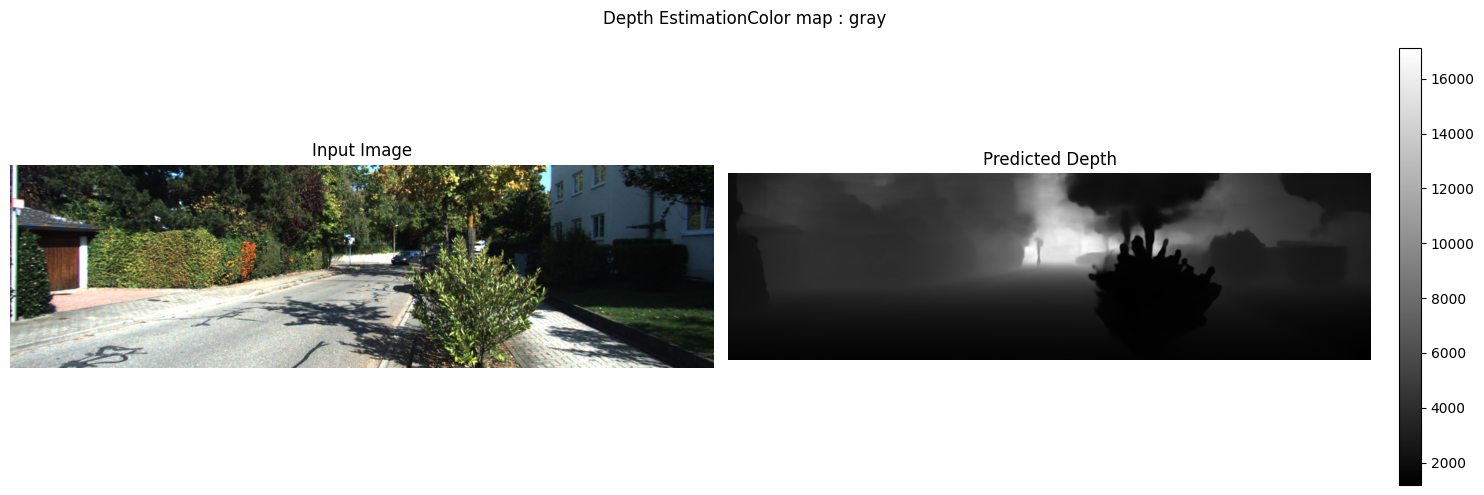

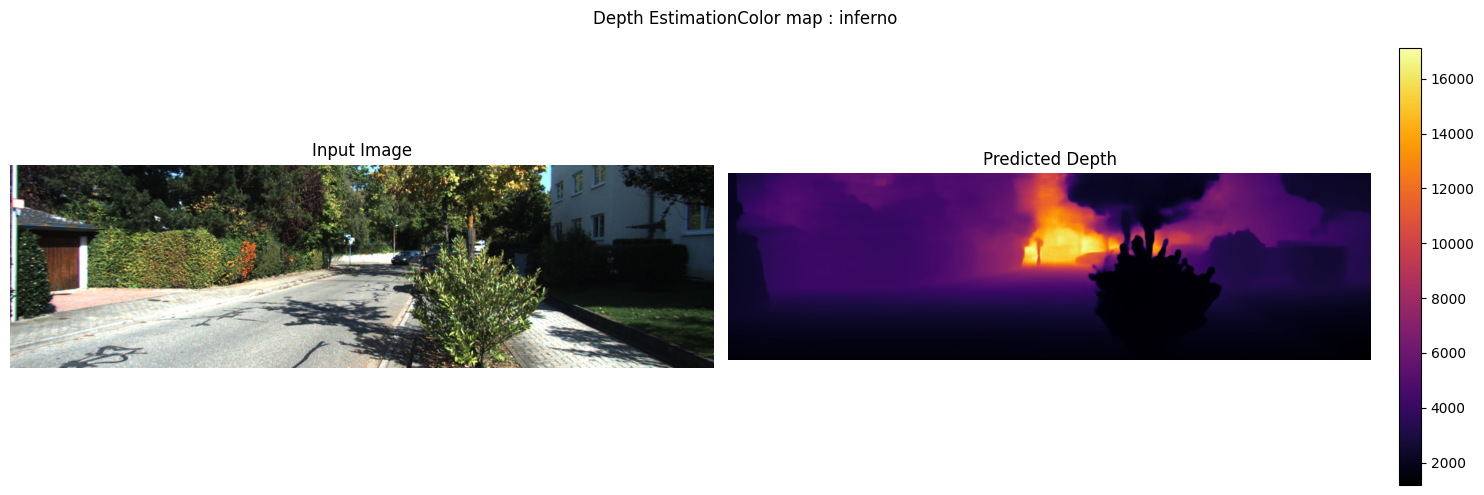

In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/Research_trends_depth_estimation/input/000000.png"
img, depth = process_image(image_path, kitti_crop=True)
visualize_depth(img, depth, "gray")
visualize_depth(img, depth, "inferno")

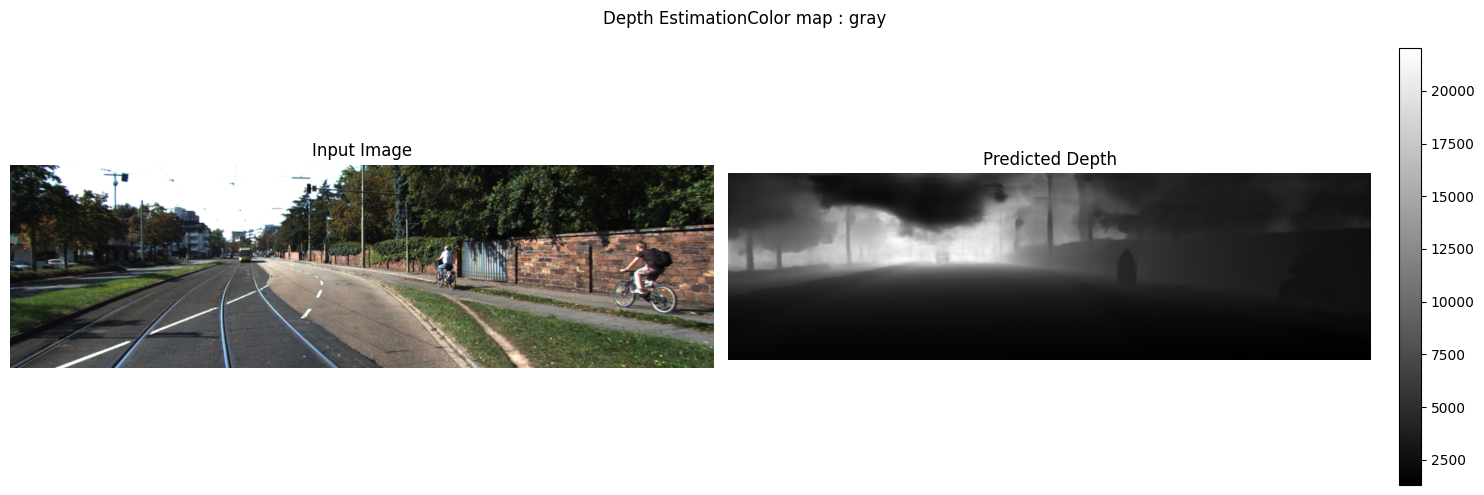

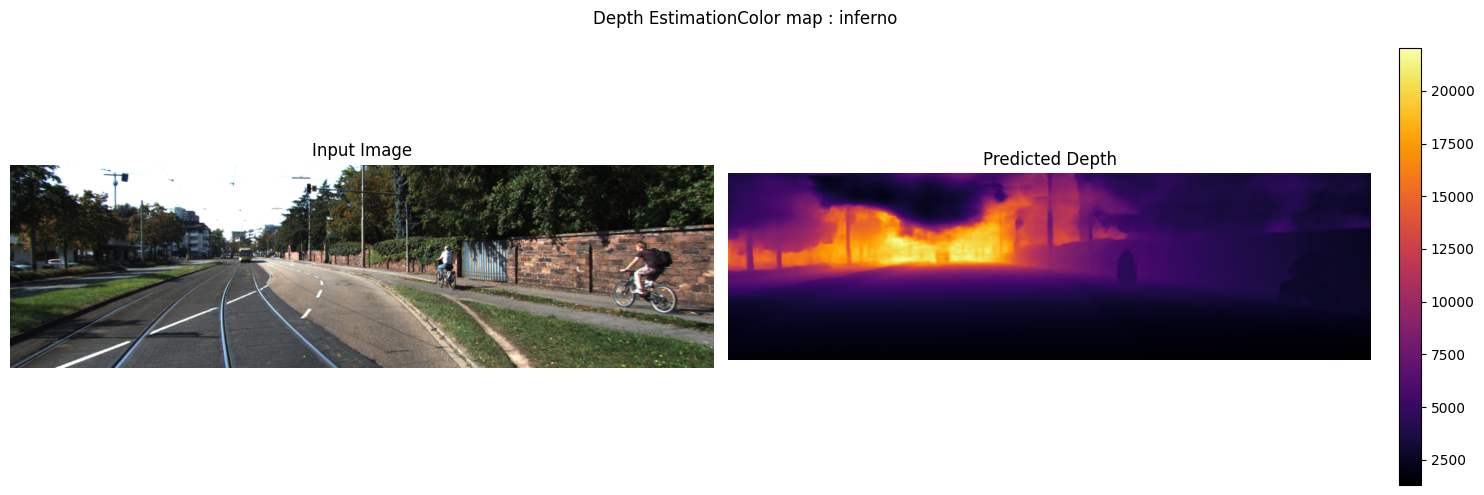

In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/Research_trends_depth_estimation/input/0000000000.png"
img, depth = process_image(image_path, kitti_crop=True)
visualize_depth(img, depth, "gray")
visualize_depth(img, depth, "inferno")

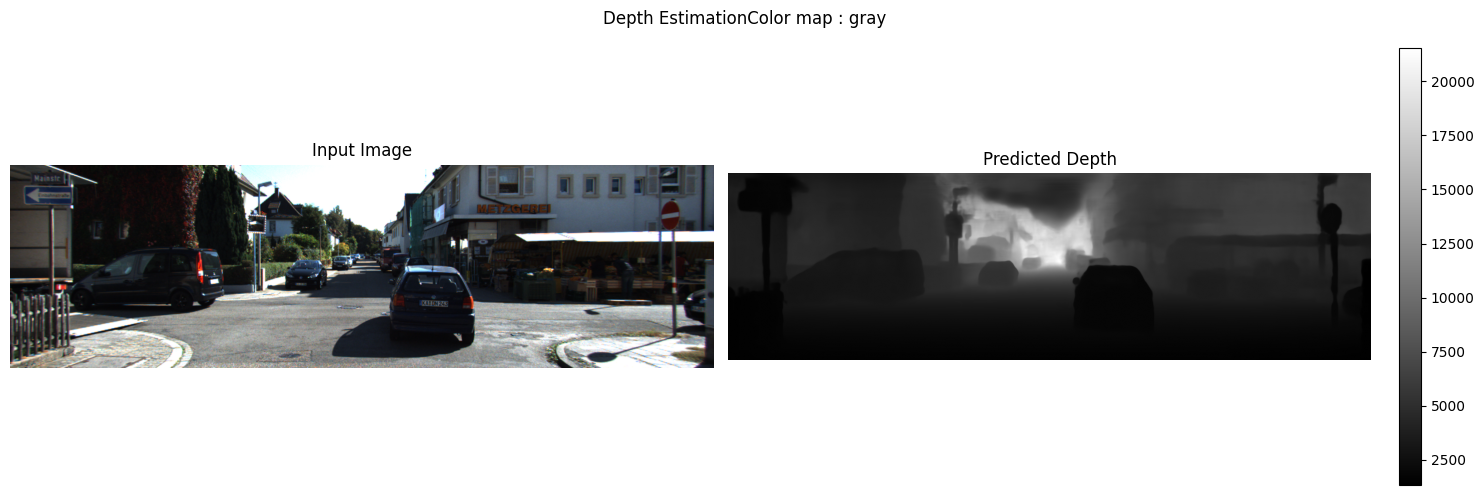

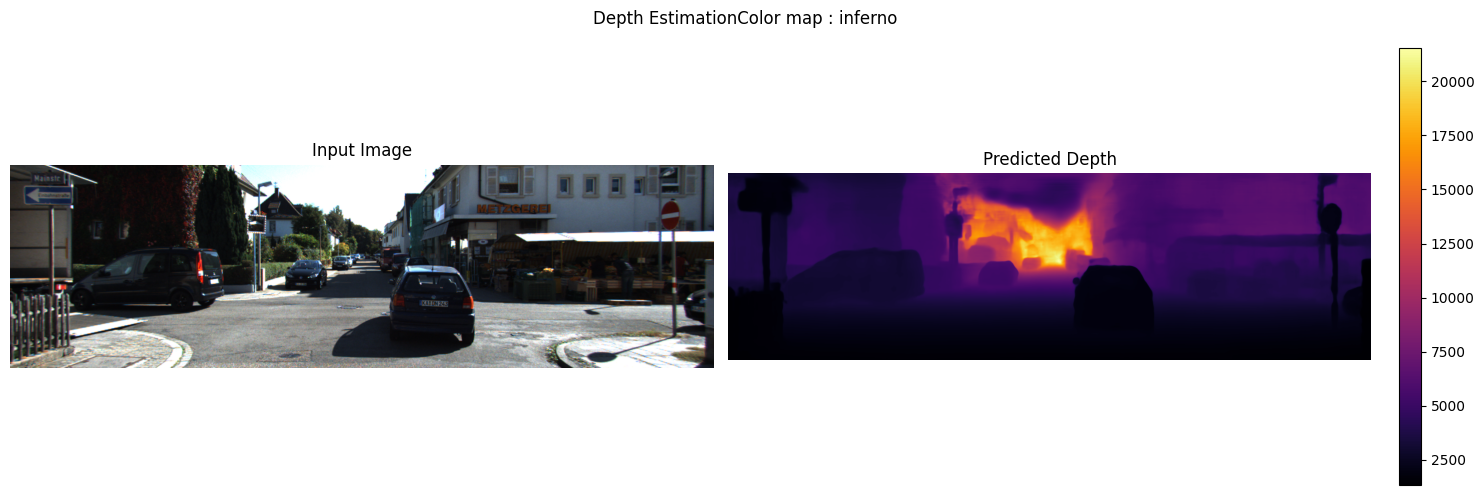

In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/Research_trends_depth_estimation/input/0000001040.png"
img, depth = process_image(image_path, kitti_crop=True)
visualize_depth(img, depth, "gray")
visualize_depth(img, depth, "inferno")

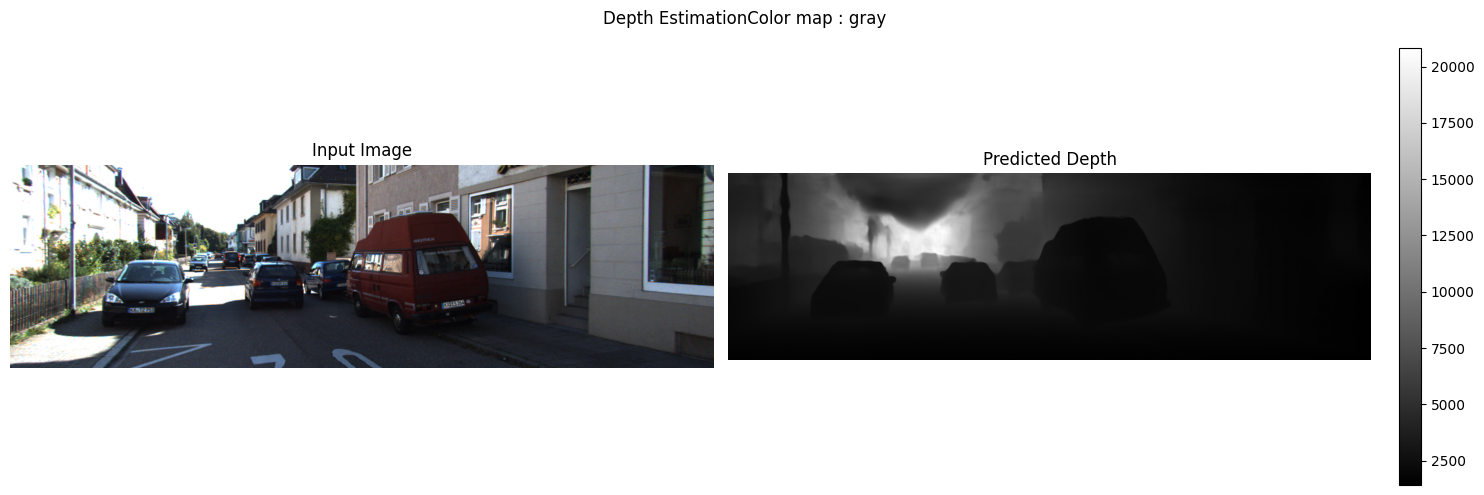

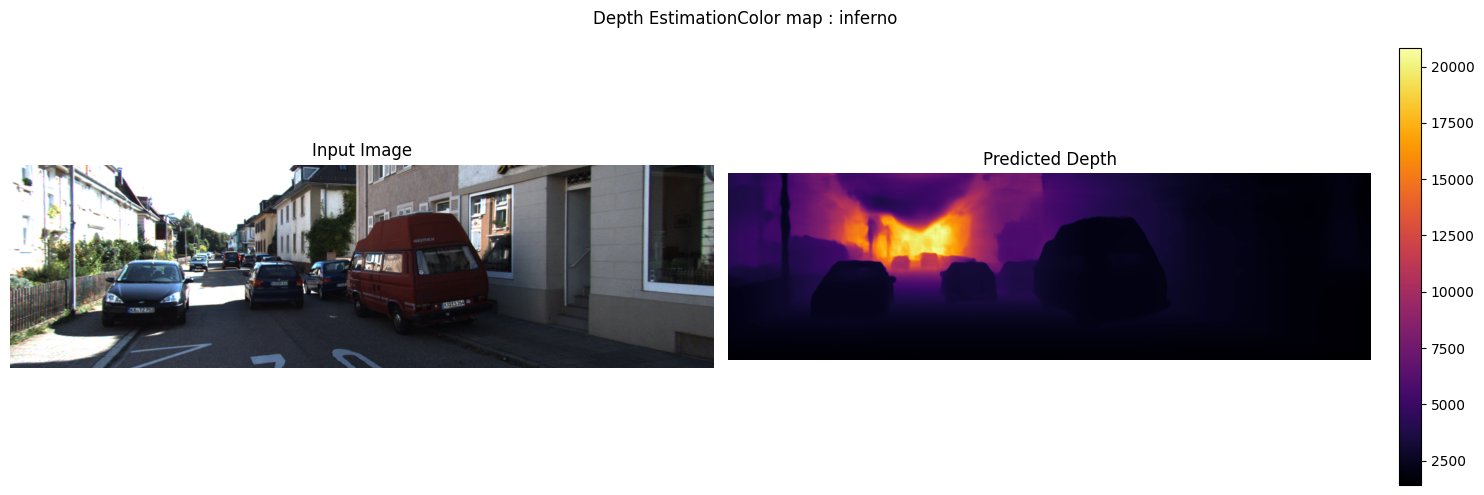

In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/Research_trends_depth_estimation/input/0000000917.png"
img, depth = process_image(image_path, kitti_crop=True)
visualize_depth(img, depth, "gray")
visualize_depth(img, depth, "inferno")

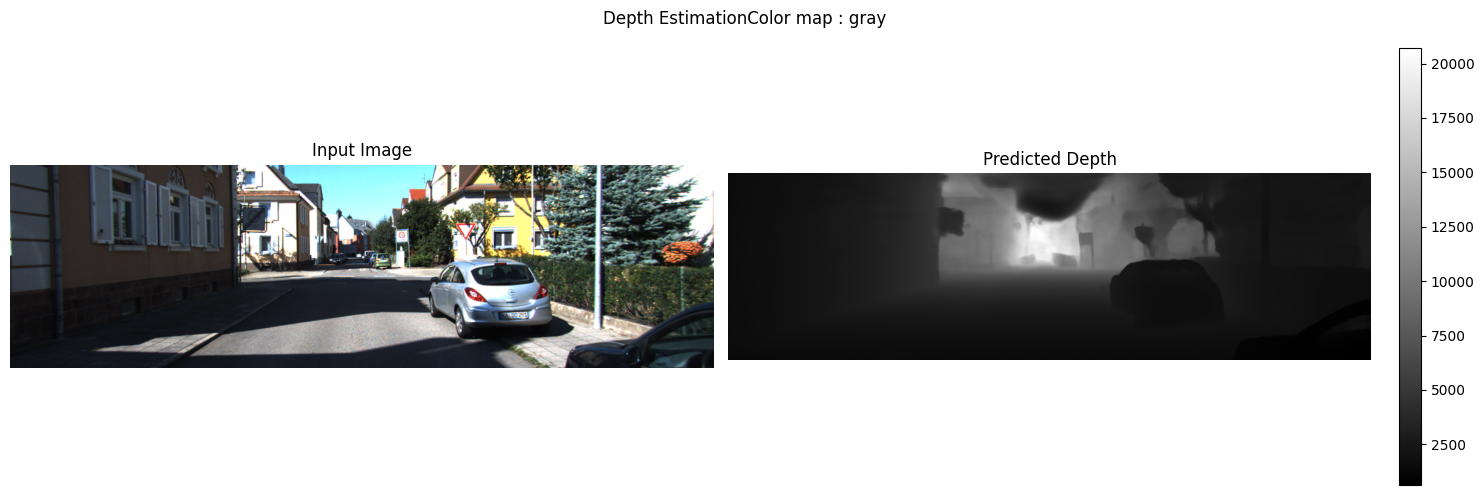

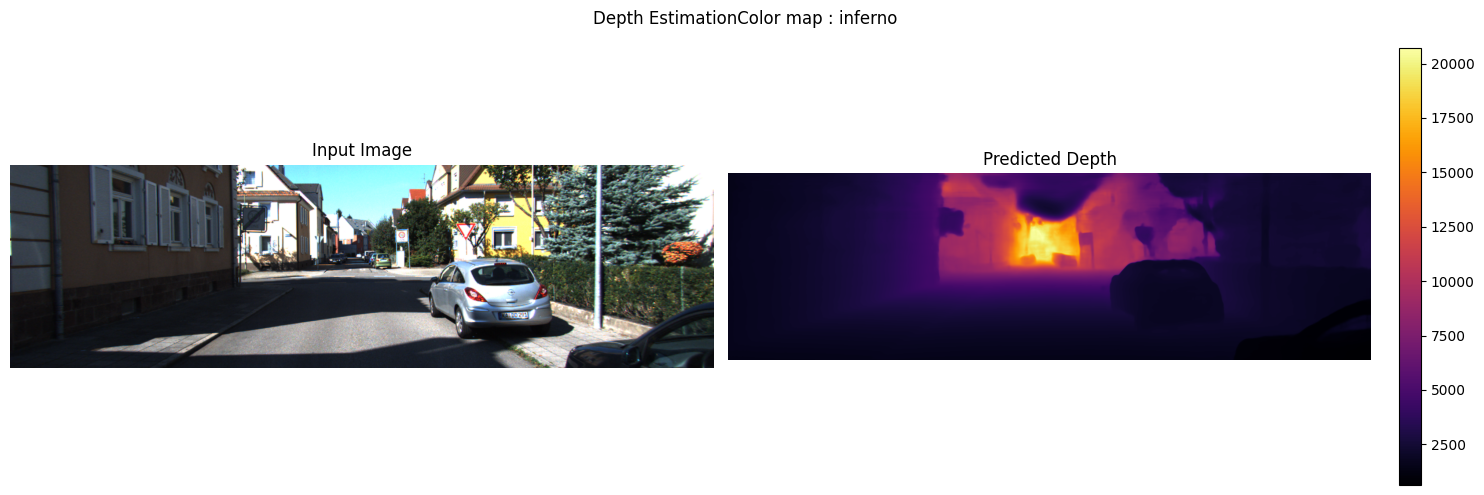

In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/Research_trends_depth_estimation/input/0000000615.png"
img, depth = process_image(image_path, kitti_crop=True)
visualize_depth(img, depth, "gray")
visualize_depth(img, depth, "inferno")

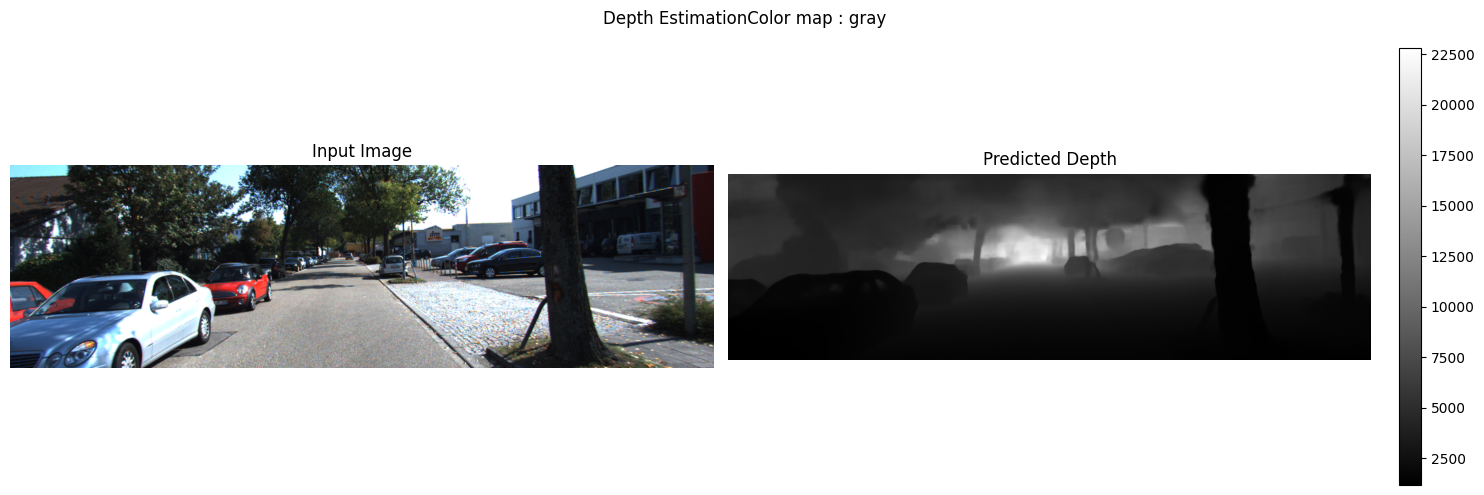

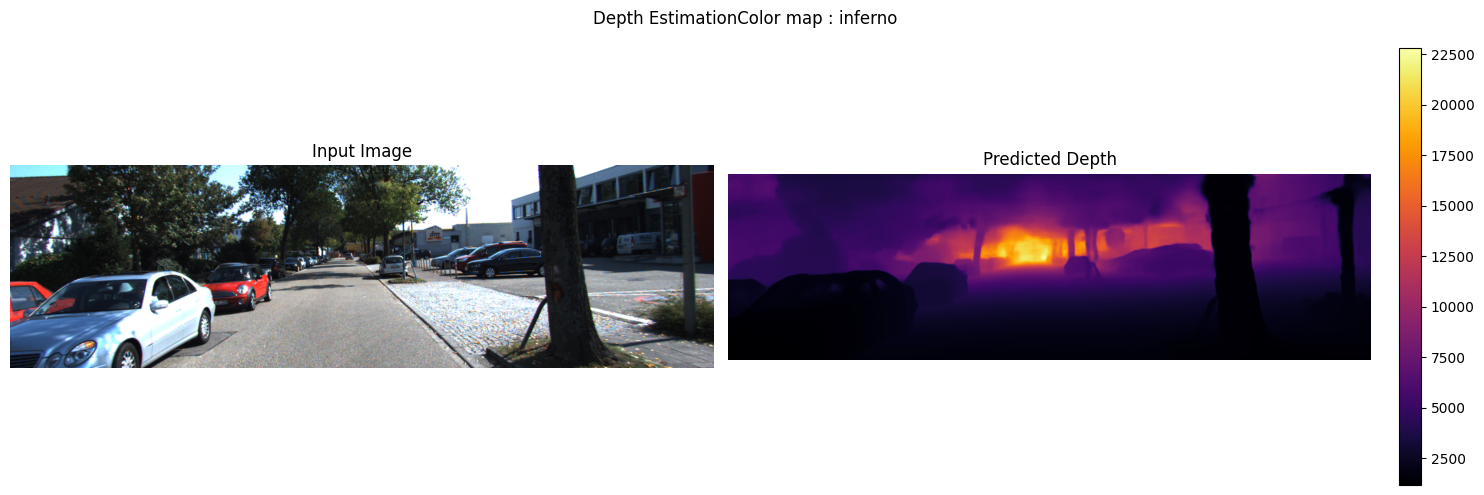

In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/Research_trends_depth_estimation/input/0000000064.png"
img, depth = process_image(image_path, kitti_crop=True)
visualize_depth(img, depth, "gray")
visualize_depth(img, depth, "inferno")

In [ ]:
print("""
DPT-Hybrid Architecture Components:

1. ENCODER (Hybrid ViT-Base + ResNet50):
   └─ ResNet50 Stem: Initial feature extraction
      ├─ Stage 0: 64 → 256 channels (H/4 × W/4) ──→ Feature 1
      ├─ Stage 1: 256 → 512 channels (H/8 × W/8) ──→ Feature 2
      └─ Output: 512 channel feature map (H/16 × W/16)

   └─ Vision Transformer (12 layers, 768-dim):
      ├─ Patch tokenization from CNN features
      ├─ Positional embeddings (learnable + interpolated)
      ├─ Multi-head self-attention (12 heads per layer)
      ├─ Global receptive field at every layer
      ├─ Block 8 output ──→ Feature 3 (768-dim tokens)
      └─ Block 11 output ──→ Feature 4 (768-dim tokens)

2. REASSEMBLE OPERATIONS:
   Transform tokens back to spatial feature maps:
   ├─ Feature 1: 256 channels @ H/4 × W/4 (CNN direct)
   ├─ Feature 2: 512 channels @ H/8 × W/8 (CNN direct)
   ├─ Feature 3: 768→256 channels @ H/16 × W/16 (projection)
   └─ Feature 4: 768→256 channels @ H/32 × W/32 (projection + downsample)

3. DECODER (Progressive Fusion):
   Coarse-to-fine feature combination:
   ├─ Fusion Block 4: Feature 4 only → 256ch @ H/16 × W/16
   ├─ Fusion Block 3: + Feature 3 → 256ch @ H/8 × W/8
   ├─ Fusion Block 2: + Feature 2 → 256ch @ H/4 × W/4
   └─ Fusion Block 1: + Feature 1 → 256ch @ H/2 × W/2

4. PREDICTION HEAD (Depth-specific):
   ├─ Conv3x3: 256 → 128 channels
   ├─ Upsample 2×: H/2 × W/2 → H × W
   ├─ Conv3x3: 128 → 32 channels + ReLU
   ├─ Conv1x1: 32 → 1 channel (inverse depth)
   └─ Scale/Shift/Invert → Metric depth (meters)

Key Innovations:
✓ Constant resolution in transformer (no progressive downsampling)
✓ Global receptive field at every stage
✓ Better fine-grained detail preservation
✓ Superior long-range dependency modeling
✓ Hybrid design: CNN low-level + Transformer high-level

Performance on KITTI:
- 28% improvement over fully-convolutional networks
- State-of-the-art zero-shot transfer
- Fine-grained depth boundaries
- Coherent global depth arrangement
""")



DPT-Hybrid Architecture Components:

1. ENCODER (Hybrid ViT-Base + ResNet50):
   └─ ResNet50 Stem: Initial feature extraction
      ├─ Stage 0: 64 → 256 channels (H/4 × W/4) ──→ Feature 1
      ├─ Stage 1: 256 → 512 channels (H/8 × W/8) ──→ Feature 2
      └─ Output: 512 channel feature map (H/16 × W/16)
   
   └─ Vision Transformer (12 layers, 768-dim):
      ├─ Patch tokenization from CNN features
      ├─ Positional embeddings (learnable + interpolated)
      ├─ Multi-head self-attention (12 heads per layer)
      ├─ Global receptive field at every layer
      ├─ Block 8 output ──→ Feature 3 (768-dim tokens)
      └─ Block 11 output ──→ Feature 4 (768-dim tokens)

2. REASSEMBLE OPERATIONS:
   Transform tokens back to spatial feature maps:
   ├─ Feature 1: 256 channels @ H/4 × W/4 (CNN direct)
   ├─ Feature 2: 512 channels @ H/8 × W/8 (CNN direct)
   ├─ Feature 3: 768→256 channels @ H/16 × W/16 (projection)
   └─ Feature 4: 768→256 channels @ H/32 × W/32 (projection + downsample)

3

# Section 7: Evaluation

In this section below benchmarking results from the original paper will be recreated

![KITTI original evaluation](https://drive.google.com/uc?export=view&id=1ClHhN00icOKNEwoZz64W9vLQ5Xylrj_-)


In [ ]:
from google.colab import drive
import os

# Setup paths
# test folder
dataset_root = "/content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test"

# Output folder for predictions
output_path = "/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval"
os.makedirs(output_path, exist_ok=True)

print(f"Dataset root: {dataset_root}")
print(f"Output path: {output_path}")

Dataset root: /content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test
Output path: /content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval


In [ ]:
import sys
import re
import numpy as np
import cv2
import torch

from PIL import Image

def write_depth(path, depth, bits=1, absolute_depth=False):
    """Write depth map to pfm and png file.

    Args:
        path (str): filepath without extension
        depth (array): depth
    """
    #write_pfm(path + ".pfm", depth.astype(np.float32))

    if absolute_depth:
        out = depth
    else:
        depth_min = depth.min()
        depth_max = depth.max()

        max_val = (2 ** (8 * bits)) - 1

        if depth_max - depth_min > np.finfo("float").eps:
            out = max_val * (depth - depth_min) / (depth_max - depth_min)
        else:
            out = np.zeros(depth.shape, dtype=depth.dtype)

    if bits == 1:
        cv2.imwrite(path, out.astype("uint8"), [cv2.IMWRITE_PNG_COMPRESSION, 0])
    elif bits == 2:
        cv2.imwrite(path, out.astype("uint16"), [cv2.IMWRITE_PNG_COMPRESSION, 0])

    return

In [ ]:
import glob
import cv2
import torch
import numpy as np
import os

# Configuration
kitti_crop = True
absolute_depth = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

search_pattern = os.path.join(dataset_root, "**", "image_02", "data", "*.png")
img_paths = glob.glob(search_pattern, recursive=True)

print(f"Found {len(img_paths)} images to process.")

def save_depth(path, depth):
    """Save depth map as 16-bit PNG.
    Note: Depth is already scaled by 256 in process_image.
    """
    depth_out = depth.astype("uint16")
    cv2.imwrite(path, depth_out)

print("Starting inference...")
processed_files = [] # Keep track of (input_path, output_path) for evaluation

for i, img_path in enumerate(img_paths):
    try:
        # process_image function (handles reading, cropping, transforming, inferencing, and scaling)
        _, prediction = process_image(img_path, kitti_crop=kitti_crop)

    except ValueError as e:
        print(f"Failed to read {img_path}")
        continue

    parts = img_path.split(os.sep)
    try:

        drive_name = parts[-4]
        filename = parts[-1]
        out_name = f"{drive_name}_{filename}"
    except:
        out_name = f"pred_{i}.png"

    out_file_path = os.path.join(output_path, out_name)
    write_depth(out_file_path, prediction, bits=2, absolute_depth=absolute_depth)

    processed_files.append((img_path, out_file_path))

    if (i + 1) % 10 == 0:
        print(f"Processed {i + 1}/{len(img_paths)}")

print("Inference finished.")

Found 697 images to process.
Starting inference...
Processed 10/697
Processed 20/697
Processed 30/697
Processed 40/697
Processed 50/697
Processed 60/697
Processed 70/697
Processed 80/697
Processed 90/697
Processed 100/697
Processed 110/697
Processed 120/697
Processed 130/697
Processed 140/697
Processed 150/697
Processed 160/697
Processed 170/697
Processed 180/697
Processed 190/697
Processed 200/697
Processed 210/697
Processed 220/697
Processed 230/697
Processed 240/697
Processed 250/697
Processed 260/697
Processed 270/697
Processed 280/697
Processed 290/697
Processed 300/697
Processed 310/697
Processed 320/697
Processed 330/697
Processed 340/697
Processed 350/697
Processed 360/697
Processed 370/697
Processed 380/697
Processed 390/697
Processed 400/697
Processed 410/697
Processed 420/697
Processed 430/697
Processed 440/697
Processed 450/697
Processed 460/697
Processed 470/697
Processed 480/697
Processed 490/697
Processed 500/697
Processed 510/697
Processed 520/697
Processed 530/697
Proc

In [ ]:
import pickle

# Save the processed_files list
output_dir = "/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval"
os.makedirs(output_dir, exist_ok=True)
save_path = os.path.join(output_dir, "processed_files.pkl")

with open(save_path, 'wb') as f:
    pickle.dump(processed_files, f)

print(f"Processed files list saved to: {save_path}")

In [ ]:
import pickle
import os

output_dir = "/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval"
save_path = os.path.join(output_dir, "processed_files.pkl")

with open(save_path, 'rb') as f:
    processed_files = pickle.load(f)

print(f"Loaded {len(processed_files)} processed file paths.")
print(processed_files[:5])

Loaded 697 processed file paths.
[('/content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/image_02/data/0000000000.png', '/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval/2011_09_26_drive_0002_sync_0000000000.png'), ('/content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/image_02/data/0000000003.png', '/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval/2011_09_26_drive_0002_sync_0000000003.png'), ('/content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/image_02/data/0000000006.png', '/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval/2011_09_26_drive_0002_sync_0000000006.png'), ('/content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/20

In [ ]:
import numpy as np
import cv2
import os
import pandas as pd
from IPython.display import display

# Evaluation Settings
min_depth_eval = 1e-3
max_depth_eval = 80
garg_crop = True
eigen_crop = False
do_kb_crop = True

def compute_errors(gt, pred):
    thresh = np.maximum((gt / pred), (pred / gt))
    d1 = (thresh < 1.25).mean()
    d2 = (thresh < 1.25 ** 2).mean()
    d3 = (thresh < 1.25 ** 3).mean()

    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())

    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())

    abs_rel = np.mean(np.abs(gt - pred) / gt)
    sq_rel = np.mean(((gt - pred)**2) / gt)

    err = np.log(pred) - np.log(gt)
    silog = np.sqrt(np.mean(err ** 2) - np.mean(err) ** 2) * 100

    log10 = np.mean(np.abs(np.log10(pred) - np.log10(gt)))

    return silog, log10, abs_rel, sq_rel, rmse, rmse_log, d1, d2, d3


In [ ]:
# Metric accumulators
metrics = {k: [] for k in ['d1', 'd2', 'd3', 'abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'silog', 'log10']}

print(f"Evaluating {len(processed_files)} samples...")
missing_gt_count = 0

for img_path, pred_path in processed_files:

    pred_depth = cv2.imread(pred_path, -1)
    if pred_depth is None: continue
    pred_depth = pred_depth.astype(np.float32) / 256.0

    parent_dir = os.path.dirname(os.path.dirname(img_path)) # path/to/drive/image_02
    drive_dir = os.path.dirname(parent_dir) # path/to/drive

    filename = os.path.basename(img_path)
    gt_path = os.path.join(drive_dir, "proj_depth", "groundtruth", "image_02", filename)

    if not os.path.exists(gt_path):
        gt_path_alt = img_path.replace("image_02/data", "proj_depth/groundtruth/image_02")
        if os.path.exists(gt_path_alt):
            gt_path = gt_path_alt

    if not os.path.exists(gt_path):
        if missing_gt_count < 5: # Print first few missing
            print(f"GT missing: {gt_path}")
        missing_gt_count += 1
        continue

    gt_depth = cv2.imread(gt_path, -1)
    if gt_depth is None: continue
    gt_depth = gt_depth.astype(np.float32) / 256.0

    # 3. Mask and Compute
    pred_depth[pred_depth < min_depth_eval] = min_depth_eval
    pred_depth[pred_depth > max_depth_eval] = max_depth_eval
    pred_depth[np.isinf(pred_depth)] = max_depth_eval

    gt_depth[np.isinf(gt_depth)] = 0
    gt_depth[np.isnan(gt_depth)] = 0

    valid_mask = np.logical_and(gt_depth > min_depth_eval, gt_depth < max_depth_eval)

    if do_kb_crop:
        height, width = gt_depth.shape
        top_margin = int(height - 352)
        left_margin = int((width - 1216) / 2)
        pred_depth_uncropped = np.zeros((height, width), dtype=np.float32)
        pred_depth_uncropped[top_margin:top_margin + 352, left_margin:left_margin + 1216] = pred_depth
        pred_depth = pred_depth_uncropped

    if garg_crop or eigen_crop:
        gt_height, gt_width = gt_depth.shape
        eval_mask = np.zeros(valid_mask.shape)
        if garg_crop:
            eval_mask[int(0.40810811 * gt_height):int(0.99189189 * gt_height), int(0.03594771 * gt_width):int(0.96405229 * gt_width)] = 1
        elif eigen_crop:
             eval_mask[int(0.3324324 * gt_height):int(0.91351351 * gt_height), int(0.0359477 * gt_width):int(0.96405229 * gt_width)] = 1

        valid_mask = np.logical_and(valid_mask, eval_mask)

    if not valid_mask.any(): continue

    silog, log10, abs_rel, sq_rel, rmse, rmse_log, d1, d2, d3 = compute_errors(gt_depth[valid_mask], pred_depth[valid_mask])

    metrics['silog'].append(silog)
    metrics['log10'].append(log10)
    metrics['abs_rel'].append(abs_rel)
    metrics['sq_rel'].append(sq_rel)
    metrics['rmse'].append(rmse)
    metrics['rmse_log'].append(rmse_log)
    metrics['d1'].append(d1)
    metrics['d2'].append(d2)
    metrics['d3'].append(d3)

if len(metrics['d1']) > 0:
    print(f"\nEvaluated {len(metrics['d1'])} pairs. (Missing GTs: {missing_gt_count})")

    # Calculate means
    results = {k: np.mean(v) for k, v in metrics.items()}

    # Create DataFrame
    df = pd.DataFrame([results])

    # Rename columns to standard KITTI evaluation style
    column_mapping = {
        'abs_rel': 'AbsRel',
        'sq_rel': 'SqRel',
        'rmse': 'RMSE',
        'rmse_log': 'RMSElog',
        'silog': 'SILog'
    }
    df = df.rename(columns=column_mapping)

    # Reorder columns for readability
    ordered_cols = ['d1', 'd2', 'd3', 'AbsRel', 'SqRel', 'RMSE', 'RMSElog', 'SILog',
                    #'log10'
                    ]
    df = df[ordered_cols]
    df = df.round(3)
    display(df)
else:
    print("No valid GT-Prediction pairs found for evaluation.")

Evaluating 697 samples...
GT missing: /content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/proj_depth/groundtruth/image_02/0000000000.png
GT missing: /content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/proj_depth/groundtruth/image_02/0000000003.png
GT missing: /content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/proj_depth/groundtruth/image_02/0000000072.png
GT missing: /content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0002_sync/proj_depth/groundtruth/image_02/0000000075.png
GT missing: /content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test/2011_09_26/2011_09_26_drive_0009_sync/proj_depth/groundtruth/image_02/0000000000.png

Evaluated 652 pairs. (Missing GTs: 45)


d1     d2     d3  AbsRel  SqRel   RMSE  RMSElog  SILog
0  0.959  0.995  0.999   0.062  0.222  2.573    0.092  8.282

![KITTI original evaluation](https://drive.google.com/uc?export=view&id=1ClHhN00icOKNEwoZz64W9vLQ5Xylrj_-)


# KITTI sequence visulaization

[KITTI Sequences](https://drive.google.com/file/d/1argmqwi1_IS69Su_XoaJ0f5ibQAvZTZ4/preview)

In [ ]:
import os
import cv2
from glob import glob

# paths
rgb_root = "/content/drive/MyDrive/Research_trends_depth_estimation/kitti-eigen-split-dataset/test"
pred_root = "/content/drive/MyDrive/Research_trends_depth_estimation/output_monodepth_kitti_eval"
out_dir = "/content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison"
os.makedirs(out_dir, exist_ok=True)

# extract frame number
def get_frame_number(filename):
    return filename.split("/")[-1].split(".")[0]

# load all RGB frames
rgb_frames = sorted(glob(os.path.join(rgb_root, "**/*/image_02/data/*.png"), recursive=True))
sequences = {}

for rgb_path in rgb_frames:
    # extract sequence name like: 2011_09_26_drive_0002_sync
    parts = rgb_path.split("/")
    drive = [p for p in parts if "_drive_" in p][0]
    seq_name = drive

    # Extract frame index
    frame_id = get_frame_number(rgb_path)  # e.g. "0000000000"

    # Prediction filename format:
    pred_name = f"{seq_name}_{frame_id}.png"
    pred_path = os.path.join(pred_root, pred_name)
    #print(pred_path)
    # Only add if prediction exists
    if os.path.exists(pred_path):
        sequences.setdefault(seq_name, []).append((rgb_path, pred_path))


# Sort each sequence by frame index
for seq in sequences:
    sequences[seq] = sorted(sequences[seq], key=lambda x: int(get_frame_number(x[0])))

print("Found sequences:", sequences.keys())


Found sequences: dict_keys(['2011_09_26_drive_0002_sync', '2011_09_26_drive_0009_sync', '2011_09_26_drive_0013_sync', '2011_09_26_drive_0020_sync', '2011_09_26_drive_0023_sync', '2011_09_26_drive_0027_sync', '2011_09_26_drive_0029_sync', '2011_09_26_drive_0036_sync', '2011_09_26_drive_0046_sync', '2011_09_26_drive_0048_sync', '2011_09_26_drive_0052_sync', '2011_09_26_drive_0056_sync', '2011_09_26_drive_0059_sync', '2011_09_26_drive_0064_sync', '2011_09_26_drive_0084_sync', '2011_09_26_drive_0086_sync', '2011_09_26_drive_0093_sync', '2011_09_26_drive_0096_sync', '2011_09_26_drive_0101_sync', '2011_09_26_drive_0106_sync', '2011_09_26_drive_0117_sync', '2011_09_28_drive_0002_sync', '2011_09_29_drive_0071_sync', '2011_09_30_drive_0016_sync', '2011_09_30_drive_0018_sync', '2011_09_30_drive_0027_sync', '2011_10_03_drive_0027_sync', '2011_10_03_drive_0047_sync'])


In [ ]:
for seq_name, frame_pairs in sequences.items():
    print("Processing:", seq_name)

    # Load first frame to get size of RGB image
    rgb0 = cv2.imread(frame_pairs[0][0])
    h_rgb, w_rgb, _ = rgb0.shape

    video_out = os.path.join(out_dir, f"{seq_name}.mp4")
    # The output video will have width of rgb and double the height (for stacked rgb and depth)
    writer = cv2.VideoWriter(video_out, cv2.VideoWriter_fourcc(*"mp4v"), 5, (w_rgb, h_rgb * 2))

    for rgb_path, pred_path in frame_pairs:
        rgb = cv2.imread(rgb_path)

        depth = cv2.imread(pred_path, cv2.IMREAD_UNCHANGED)
        if depth is None:
            continue

        # Optional: apply colormap to depth for visualization
        depth_norm = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX)
        depth_color = cv2.applyColorMap(depth_norm.astype("uint8"), cv2.COLORMAP_MAGMA)

        # Ensure depth_color has the same dimensions as rgb before concatenation
        # Resize depth_color to match rgb's width and height
        depth_color_resized = cv2.resize(depth_color, (w_rgb, h_rgb))

        # Stack vertically (TOP: RGB, BOTTOM: DEPTH)
        stacked = cv2.vconcat([rgb, depth_color_resized])

        writer.write(stacked)

    writer.release()
    print("Saved:", video_out)


Processing: 2011_09_26_drive_0002_sync
Saved: /content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/2011_09_26_drive_0002_sync.mp4
Processing: 2011_09_26_drive_0009_sync
Saved: /content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/2011_09_26_drive_0009_sync.mp4
Processing: 2011_09_26_drive_0013_sync
Saved: /content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/2011_09_26_drive_0013_sync.mp4
Processing: 2011_09_26_drive_0020_sync
Saved: /content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/2011_09_26_drive_0020_sync.mp4
Processing: 2011_09_26_drive_0023_sync
Saved: /content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/2011_09_26_drive_0023_sync.mp4
Processing: 2011_09_26_drive_0027_sync
Saved: /content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/2011_09_26_drive_0027_sync.mp4
Processing: 2011_09_26_drive_0029_sync
S

In [ ]:
import cv2
import os
from glob import glob

def concat_videos(input_dir, output_path, fps=5):
    """
    Concatenates all MP4 videos from input_dir into a single output video.

    Parameters:
        input_dir (str): Folder containing the per-sequence mp4s.
        output_path (str): Path to save the final combined video.
        fps (int): Frames per second for the output video.
    """
    video_paths = sorted(glob(os.path.join(input_dir, "*.mp4")))

    if len(video_paths) == 0:
        print("No videos found in:", input_dir)
        return

    print(f"Found {len(video_paths)} videos to combine.")

    # Read first video to determine size
    first_cap = cv2.VideoCapture(video_paths[0])
    ret, frame = first_cap.read()
    if not ret:
        print("Error: cannot read first video:", video_paths[0])
        return

    height, width = frame.shape[:2]
    first_cap.release()

    # Create writer
    writer = cv2.VideoWriter(
        output_path,
        cv2.VideoWriter_fourcc(*"mp4v"),
        fps,
        (width, height)
    )
    print("Output resolution:", (width, height))

    # Process each video
    for vpath in video_paths:
        print("Adding:", os.path.basename(vpath))
        cap = cv2.VideoCapture(vpath)

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Resize if needed (safety)
            if frame.shape[1] != width or frame.shape[0] != height:
                frame = cv2.resize(frame, (width, height))

            writer.write(frame)

        cap.release()

    writer.release()
    print("Combined video saved to:", output_path)


input_dir = "/content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison"
output_path = "/content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/kitti_full_combined.mp4"

concat_videos(input_dir, output_path, fps=5)


Found 30 videos to combine.
Output resolution: (1242, 750)
Adding: 2011_09_26_drive_0002_sync.mp4
Adding: 2011_09_26_drive_0009_sync.mp4
Adding: 2011_09_26_drive_0013_sync.mp4
Adding: 2011_09_26_drive_0020_sync.mp4
Adding: 2011_09_26_drive_0023_sync.mp4
Adding: 2011_09_26_drive_0027_sync.mp4
Adding: 2011_09_26_drive_0029_sync.mp4
Adding: 2011_09_26_drive_0036_sync.mp4
Adding: 2011_09_26_drive_0046_sync.mp4
Adding: 2011_09_26_drive_0048_sync.mp4
Adding: 2011_09_26_drive_0052_sync.mp4
Adding: 2011_09_26_drive_0056_sync.mp4
Adding: 2011_09_26_drive_0059_sync.mp4
Adding: 2011_09_26_drive_0064_sync.mp4
Adding: 2011_09_26_drive_0084_sync.mp4
Adding: 2011_09_26_drive_0086_sync.mp4
Adding: 2011_09_26_drive_0093_sync.mp4
Adding: 2011_09_26_drive_0096_sync.mp4
Adding: 2011_09_26_drive_0101_sync.mp4
Adding: 2011_09_26_drive_0106_sync.mp4
Adding: 2011_09_26_drive_0117_sync.mp4
Adding: 2011_09_28_drive_0002_sync.mp4
Adding: 2011_09_29_drive_0071_sync.mp4
Adding: 2011_09_30_drive_0016_sync.mp4
Addin

In [3]:
import os
import shutil
from IPython.display import Video, display

def play_video_compatible(video_path):
    # 1. Define paths
    local_tmp_dir = "/content/tmp"
    os.makedirs(local_tmp_dir, exist_ok=True)

    local_path = os.path.join(local_tmp_dir, "temp_video.mp4")
    converted_path = os.path.join(local_tmp_dir, "temp_video_h264.mp4")

    # 2. Copy the original file to local runtime
    if os.path.exists(local_path):
        os.remove(local_path)
    shutil.copy(video_path, local_path)

    # 3. Convert video to H.264 using FFmpeg
    # -y overwrites output file without asking
    # -vcodec libx264 ensures browser compatibility
    # -acodec aac handles audio
    print(f"Converting video: {video_path}...")
    os.system(f"ffmpeg -i {local_path} -vcodec libx264 -acodec aac -y {converted_path} > /dev/null 2>&1")

    # 4. Display the converted video
    if os.path.exists(converted_path):
        print(f"Playing video...")
        display(Video(converted_path, embed=True, width=600))
    else:
        print("Conversion failed. Please check the file path.")

# Your video path
video_path = "/content/drive/MyDrive/Research_trends_depth_estimation/kitti_sequences_comparison/kitti_full_combined.mp4"

# Run the function
play_video_compatible(video_path)

[KITTI Sequences](https://drive.google.com/file/d/1argmqwi1_IS69Su_XoaJ0f5ibQAvZTZ4/preview)